In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
import pandas as pd 

from train import TrainerDAGMM
from test import eval
from preprocess import get_KDDCup99

In [5]:
class Args:
    num_epochs=200
    patience=50
    lr=1e-3
    lr_milestones=[50]
    batch_size=1024
    latent_dim=1
    n_gmm=4
    lambda_energy=0.1
    lambda_cov=0.005
    lambda_recon=1.0
    lambda_kl=0.01
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_KDDCup99(args)

dagmm = TrainerDAGMM(args, data, device)
dagmm.train()

  1024/198371: [>...............................] - ETA 0.0sn_gmm: 4
cov size: 4
z_mu shape: torch.Size([1024, 4, 3, 1])
cov_inverse shape: torch.Size([1, 4, 3, 3])
  2048/198371: [>...............................] - ETA 4.9sn_gmm: 4
cov size: 4
z_mu shape: torch.Size([1024, 4, 3, 1])
cov_inverse shape: torch.Size([1, 4, 3, 3])
  3072/198371: [>...............................] - ETA 4.8sn_gmm: 4
cov size: 4
z_mu shape: torch.Size([1024, 4, 3, 1])
cov_inverse shape: torch.Size([1, 4, 3, 3])
  4096/198371: [>...............................] - ETA 4.8sn_gmm: 4
cov size: 4
z_mu shape: torch.Size([1024, 4, 3, 1])
cov_inverse shape: torch.Size([1, 4, 3, 3])
  5120/198371: [>...............................] - ETA 4.8sn_gmm: 4
cov size: 4
z_mu shape: torch.Size([1024, 4, 3, 1])
cov_inverse shape: torch.Size([1, 4, 3, 3])
  6144/198371: [>...............................] - ETA 4.8sn_gmm: 4
cov size: 4
z_mu shape: torch.Size([1024, 4, 3, 1])
cov_inverse shape: torch.Size([1, 4, 3, 3])
  7168/198

In [7]:
from test import eval

labels, scores = eval(dagmm.model, data, device, args.n_gmm)

Testing...
n_gmm: 4
cov size: 3
z_mu shape: torch.Size([1024, 3, 4, 1])
cov_inverse shape: torch.Size([1, 3, 4, 4])
n_gmm: 4
cov size: 3
z_mu shape: torch.Size([1024, 3, 4, 1])
cov_inverse shape: torch.Size([1, 3, 4, 4])
n_gmm: 4
cov size: 3
z_mu shape: torch.Size([1024, 3, 4, 1])
cov_inverse shape: torch.Size([1, 3, 4, 4])
n_gmm: 4
cov size: 3
z_mu shape: torch.Size([1024, 3, 4, 1])
cov_inverse shape: torch.Size([1, 3, 4, 4])
n_gmm: 4
cov size: 3
z_mu shape: torch.Size([1024, 3, 4, 1])
cov_inverse shape: torch.Size([1, 3, 4, 4])
n_gmm: 4
cov size: 3
z_mu shape: torch.Size([1024, 3, 4, 1])
cov_inverse shape: torch.Size([1, 3, 4, 4])
n_gmm: 4
cov size: 3
z_mu shape: torch.Size([1024, 3, 4, 1])
cov_inverse shape: torch.Size([1, 3, 4, 4])
n_gmm: 4
cov size: 3
z_mu shape: torch.Size([1024, 3, 4, 1])
cov_inverse shape: torch.Size([1, 3, 4, 4])
n_gmm: 4
cov size: 3
z_mu shape: torch.Size([1024, 3, 4, 1])
cov_inverse shape: torch.Size([1, 3, 4, 4])
n_gmm: 4
cov size: 3
z_mu shape: torch.Size(

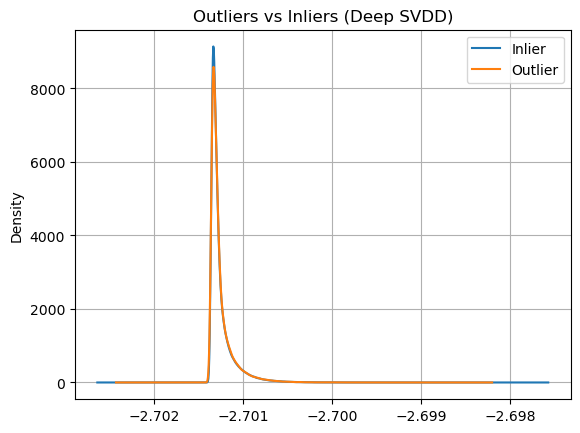

In [8]:
scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()